<a href="https://colab.research.google.com/github/Abyukth-DA-code/SCT_ML_1/blob/main/SCT_ML_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import zipfile
import os

# Define the path to the zip file and the extraction directory
zip_file_path = "/content/house-prices-advanced-regression-techniques.zip"
extracted_dir_path = "/content/house-prices-advanced-regression-techniques"

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

# 2. Load training data
train = pd.read_csv(os.path.join(extracted_dir_path, "train.csv"))

# 3. Select features (square footage, bedrooms, bathrooms)
X = train[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = train['SalePrice']

# 4. Split data (80% train, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Evaluate on validation set
y_val_pred = model.predict(X_val)
print("Intercept:", model.intercept_)
print("Coefficients:", list(zip(X.columns, model.coef_)))
print("Mean Squared Error:", mean_squared_error(y_val, y_val_pred))
print("R² Score:", r2_score(y_val, y_val_pred))

# 7. Load test data and predict
test = pd.read_csv(os.path.join(extracted_dir_path, "test.csv"))
X_test_data = test[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
test_predictions = model.predict(X_test_data)

# 8. Create submission file
sample_submission = pd.read_csv(os.path.join(extracted_dir_path, "sample_submission.csv"))
submission = sample_submission.copy()
submission['SalePrice'] = test_predictions
submission.to_csv("submission.csv", index=False)

print("✅ Submission file saved as submission.csv")

Intercept: 52261.74862694461
Coefficients: [('GrLivArea', np.float64(104.0263070122644)), ('BedroomAbvGr', np.float64(-26655.16535734126)), ('FullBath', np.float64(30014.324108956596))]
Mean Squared Error: 2806426667.247853
R² Score: 0.6341189942328371
✅ Submission file saved as submission.csv


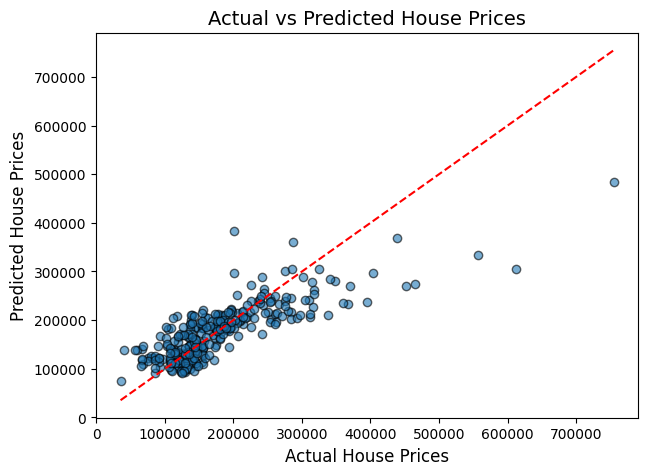

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
plt.scatter(y_val, y_val_pred, alpha=0.6, edgecolors="k")
plt.xlabel("Actual House Prices", fontsize=12)
plt.ylabel("Predicted House Prices", fontsize=12)
plt.title("Actual vs Predicted House Prices", fontsize=14)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'r--')  # diagonal reference line
plt.show()
